In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_note_interactivity = "all"
%matplotlib inline


import os
import sys
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

主要研究这三种情况：

1. 时间戳，具体的时刻；

2. 固定的时间区间，例如2007年的1月或整个2010年

3. 时间间隔，由开始和结束时间戳表示。

1. 时间数据的类型和工具

——————字符串与datetime之间的转换

2. 时间序列基础

——————索引、选择、子集

——————含有重复索引的时间索引

3. 日期范围、频率和移位

——————生成日期范围

——————频率和日期偏置

——————移位（向前和向后）日期

4. 时区处理

——————时区的本地化和转换

——————时区感知时间戳对象操作

5. 时间区间和区间算术

——————区间陪频率转换

——————季度区间频率

——————将时间戳转换为区间（以及逆运算）

——————从数组生成PeriodIndex

6. 重新采样与频率转换

——————向下采样

——————向上采样与插值

——————使用区间进行重新采样

7. 移动窗口函数

——————指数加权函数

——————二元移动窗口函数

——————用户自定义移动窗口函数

datetime模块中的类型：

date————使用公历日历存储日历日期（年，月，日）

time————将时间存储为小时，分钟，秒和微妙

datetime————存储为日期和时间

timedelta————表示两个datetime值之间的差（如日，秒和微妙）

tzinfo————用于存储时区信息的基本类型

In [2]:
from datetime import datetime
now = datetime.now()
now

datetime.datetime(2019, 5, 5, 16, 14, 1, 305532)

In [3]:
now.year, now.month, now.day, now.hour, now.minute

(2019, 5, 5, 16, 14)

In [4]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)

In [5]:
delta

datetime.timedelta(926, 56700)

In [6]:
delta.days

926

In [7]:
delta.seconds

56700

In [8]:
from datetime import timedelta

start = datetime(2011, 1, 7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [9]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

1.1 字符串与datetime互换

datetime格式说明：

%Y————————————四位年

%y————————————两位年

%m————————————两位月

%d————————————两位日

%H————————————小时，24制

%I————————————小时，12制

%M————————————两位分钟

%S————————————秒

%w————————————星期日期【0，6】，0指周天

%U————————————一年中的星期数【0，53】。以周天为每周起始天。

%W————————————一年中的星期数。以周一为起始天。

%z————————————格式为+HHMM或-HHMM的UTC时区偏移

%F————————————%Y-%m-%d的简写（2012-4-22）

%D————————————%Y/%m/%d的简写（04/18/12）

两个函数：

1. strftime：传入datetime对象或pandas的Timestamp对象，输出格式化时间；string format time

2. strptime：传入格式化字符串，转换为datetime对象。在已知格式下比较好用。string parse time

In [10]:
stamp = datetime(2011, 1, 3)
str(stamp)

'2011-01-03 00:00:00'

In [11]:
stamp.strftime('%F')

'2011-01-03'

In [12]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [13]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [14]:
datestrs = ['7/6/2011', '8/6/2011']

In [15]:
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

利用第三方dateutil包中的parser.parse方法可以解析通用日期格式，非常方便。

In [16]:
from dateutil.parser import parse
#该工具好用但并不完美，例如会把42解析成2042年

In [17]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [18]:
#dateutil.parser能够解析大部分人类能理解的日期表达

parse('JAN 13, 1997 10:45 PM')

datetime.datetime(1997, 1, 13, 22, 45)

In [19]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

pandas.to_datetime()可以处理pandas数据对象中行索引和列中的时间，并支持多种格式，其中包括标准的日期格式，比如ISO8601

In [20]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']

In [21]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [22]:
#to_datetime方法还可以处理那些被认为是缺失值的值（None、空字符串等）

idx = pd.to_datetime(datestrs + [None])

In [23]:
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [24]:
idx[2]

NaT

In [25]:
pd.isnull(idx)

array([False, False,  True])

Nat——not a time是pandas中时间戳数据的null值

2. 时间序列基础

In [26]:
from datetime import datetime

In [27]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7), 
         datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [28]:
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02   -0.587650
2011-01-05   -0.384742
2011-01-07   -0.493942
2011-01-08   -1.538126
2011-01-10   -0.850861
2011-01-12   -1.483659
dtype: float64

In [29]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [30]:
#按照时间索引算术对齐

ts + ts[::2]

2011-01-02   -1.175300
2011-01-05         NaN
2011-01-07   -0.987884
2011-01-08         NaN
2011-01-10   -1.701723
2011-01-12         NaN
dtype: float64

In [31]:
ts.index.dtype

dtype('<M8[ns]')

In [32]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

需要注意的是DatetimeIndex中的标量值是pandas中的Timestamp对象

2.1 索引、选择、子集

In [33]:
stamp = ts.index[2]

In [34]:
stamp

Timestamp('2011-01-07 00:00:00')

In [35]:
ts[stamp]

-0.4939418997545257

In [36]:
#可以显式引用
ts['1/10/2011']

-0.8508613457891899

In [37]:
ts['20110110']

-0.8508613457891899

In [38]:
#pd.date_range
longer_ts = pd.Series(np.random.randn(1000),
                     index=pd.date_range('1/1/2000', periods=1000))

In [39]:
longer_ts[-10:]

2002-09-17   -0.845486
2002-09-18   -0.571537
2002-09-19   -1.566762
2002-09-20   -1.397863
2002-09-21   -0.317535
2002-09-22   -0.731746
2002-09-23    0.817367
2002-09-24   -0.423856
2002-09-25    0.049524
2002-09-26   -0.612441
Freq: D, dtype: float64

In [40]:
longer_ts['2001'][:10]

2001-01-01    0.689819
2001-01-02    2.429114
2001-01-03    0.922961
2001-01-04    0.181755
2001-01-05   -0.496762
2001-01-06    0.944429
2001-01-07    0.177038
2001-01-08    1.093445
2001-01-09    0.655961
2001-01-10    1.443934
Freq: D, dtype: float64

In [41]:
longer_ts['2001-09']

2001-09-01   -0.371490
2001-09-02    1.003315
2001-09-03    0.585553
2001-09-04   -0.820899
2001-09-05    0.115537
2001-09-06   -1.408930
2001-09-07   -0.168266
2001-09-08   -1.475340
2001-09-09   -0.455463
2001-09-10    1.883360
2001-09-11    1.202664
2001-09-12   -1.073537
2001-09-13   -0.554839
2001-09-14   -0.203483
2001-09-15   -0.146179
2001-09-16   -1.119195
2001-09-17   -0.330140
2001-09-18    1.060815
2001-09-19   -0.471119
2001-09-20   -0.197682
2001-09-21   -0.479193
2001-09-22    2.462568
2001-09-23   -1.794714
2001-09-24    0.020614
2001-09-25   -0.129932
2001-09-26   -0.995420
2001-09-27    1.785870
2001-09-28    1.331645
2001-09-29   -0.556961
2001-09-30   -1.552786
Freq: D, dtype: float64

In [42]:
#时间索引切片

ts[datetime(2011, 1, 7):]

2011-01-07   -0.493942
2011-01-08   -1.538126
2011-01-10   -0.850861
2011-01-12   -1.483659
dtype: float64

In [43]:
ts

2011-01-02   -0.587650
2011-01-05   -0.384742
2011-01-07   -0.493942
2011-01-08   -1.538126
2011-01-10   -0.850861
2011-01-12   -1.483659
dtype: float64

In [44]:
ts['1/6/2011' : '1/11/2011']

2011-01-07   -0.493942
2011-01-08   -1.538126
2011-01-10   -0.850861
dtype: float64

可以传递字符串的日期、datetime对象或者timestamp

In [45]:
#truncate函数，可以在两个日期间对Series进行切片
ts.truncate(after='1/9/2011')

2011-01-02   -0.587650
2011-01-05   -0.384742
2011-01-07   -0.493942
2011-01-08   -1.538126
dtype: float64

In [46]:
#上述操作完美适用于df

dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')

In [47]:
dates

DatetimeIndex(['2000-01-05', '2000-01-12', '2000-01-19', '2000-01-26',
               '2000-02-02', '2000-02-09', '2000-02-16', '2000-02-23',
               '2000-03-01', '2000-03-08', '2000-03-15', '2000-03-22',
               '2000-03-29', '2000-04-05', '2000-04-12', '2000-04-19',
               '2000-04-26', '2000-05-03', '2000-05-10', '2000-05-17',
               '2000-05-24', '2000-05-31', '2000-06-07', '2000-06-14',
               '2000-06-21', '2000-06-28', '2000-07-05', '2000-07-12',
               '2000-07-19', '2000-07-26', '2000-08-02', '2000-08-09',
               '2000-08-16', '2000-08-23', '2000-08-30', '2000-09-06',
               '2000-09-13', '2000-09-20', '2000-09-27', '2000-10-04',
               '2000-10-11', '2000-10-18', '2000-10-25', '2000-11-01',
               '2000-11-08', '2000-11-15', '2000-11-22', '2000-11-29',
               '2000-12-06', '2000-12-13', '2000-12-20', '2000-12-27',
               '2001-01-03', '2001-01-10', '2001-01-17', '2001-01-24',
      

In [48]:
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates, 
                       columns=['Colorado', 'Texas', 'Newo York', 'Ohio'])

In [49]:
long_df.loc['2001-5']

,Colorado,Texas,Newo York,Ohio
2001-05-02,-0.226415,1.375413,-1.221666,0.272328
2001-05-09,0.982126,0.425946,0.345640,-0.190522
2001-05-16,-0.403522,0.834905,-2.534954,0.672963
2001-05-23,-0.014332,-0.493265,1.215328,-0.782411
2001-05-30,-0.290987,1.613984,-0.312522,0.756117


2.2 含有重复索引的时间序列

In [50]:
dates= pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000', '1/3/2000'])

In [51]:
type(dates)

pandas.tseries.index.DatetimeIndex

In [52]:
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [53]:
dup_ts.index.is_unique

False

In [54]:
dup_ts['1/3/2000'] #不重复

4

In [55]:
dup_ts['1/2/2000'] #重复

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [56]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [57]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

3. 日期范围、频率和移位

In [58]:
ts

2011-01-02   -0.587650
2011-01-05   -0.384742
2011-01-07   -0.493942
2011-01-08   -1.538126
2011-01-10   -0.850861
2011-01-12   -1.483659
dtype: float64

In [59]:
resampler = ts.resample('D') #'D'表示每日频率

In [60]:
resampler

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

3.1 生成日期范围

利用pandas.date_range是用于根据特定频率生成指定长度的DatetimeIndex

In [61]:
index = pd.date_range('2012-04-01', '2012-06-01')

In [62]:
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [63]:
#默认生成的是每日的时间戳。如果只传递一个起始或始尾日期，则必须传递一个用于生成范围的数字：
pd.date_range(start='2012-1-2', periods=20)

DatetimeIndex(['2012-01-02', '2012-01-03', '2012-01-04', '2012-01-05',
               '2012-01-06', '2012-01-07', '2012-01-08', '2012-01-09',
               '2012-01-10', '2012-01-11', '2012-01-12', '2012-01-13',
               '2012-01-14', '2012-01-15', '2012-01-16', '2012-01-17',
               '2012-01-18', '2012-01-19', '2012-01-20', '2012-01-21'],
              dtype='datetime64[ns]', freq='D')

In [64]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

开始日期和结束日期严格定义了生成日期频率的边界。可以传递频率（如：BM,BUSINESS END OF MONTH）,月度业务结尾等等表征频率的参量。

In [65]:
pd.date_range('2000-01-01', '2000.12.01', freq='BM')#看来用点间隔也没啥问题

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

基础时间序列频率表（请参考《利用pandas进行数据分析（第二版）》314页）这里只列举部分，现用现搜：

D

B

T

S

L

U

M

BM

MS

BMS

W-MON[[MON,TUE,WED,THU,FRI,SAT,SUN]]

WOM-1MON,WOM-2MON

Q-JAN, Q-FEB

.....and so on

In [66]:
#生成保准化的零点时间戳，有一个normalize选项

pd.date_range('2012.5.2 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

3.2 频率和日期偏置

pandas中的频率是由*基础频率*和*倍数*组成的。基础频率通常有简单的字符串别名，例如：M代表每月，H代表每小时。对于每个基础频率，都有一个对象可以被用于定义日期偏置。

In [67]:
from pandas.tseries.offsets import Hour, Minute

In [68]:
hour = Hour()

In [69]:
hour

<Hour>

In [70]:
four_hours = Hour(4)

In [71]:
four_hours

<4 * Hours>

In [72]:
pd.date_range('2000.1.1', '2000.1.3 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [73]:
Hour(2) + Minute(30)

<150 * Minutes>

In [74]:
pd.date_range('2000.1.1', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

有些频率描述点的时间并不是均匀分隔的。例如，M日历月末和BM月内最后工作日取决于当月的天数。这样的日期被称为*锚点偏置类*

In [75]:
#"月中某星期"week of month的日期是一个常用的频率类，以'WOM'开始，他允许用户获取每月第三个星期五这样的时间。

In [76]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq = 'WOM-3FRI')

In [77]:
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

3.3 向前和向后移位日期

In [78]:
#“移位”是指将日期按照时间向前移动或者向后移动。Series和DF都有一个shift方法用于简单的向前或向后移位，而不改变索引：

ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))

In [79]:
ts

2000-01-31    1.572861
2000-02-29   -1.904491
2000-03-31    0.497720
2000-04-30   -0.565509
Freq: M, dtype: float64

In [80]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    1.572861
2000-04-30   -1.904491
Freq: M, dtype: float64

In [81]:
ts.shift(-2)

2000-01-31    0.497720
2000-02-29   -0.565509
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

shift常用于计算时间序列或DF多列时间序列的百分比变化

ts.shift(2, freq='D')


In [82]:
ts.shift(2, freq='D')

2000-02-02    1.572861
2000-03-02   -1.904491
2000-04-02    0.497720
2000-05-02   -0.565509
dtype: float64

In [83]:
ts.shift(2, freq='M')

2000-03-31    1.572861
2000-04-30   -1.904491
2000-05-31    0.497720
2000-06-30   -0.565509
Freq: M, dtype: float64

In [84]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00    1.572861
2000-02-29 01:30:00   -1.904491
2000-03-31 01:30:00    0.497720
2000-04-30 01:30:00   -0.565509
Freq: M, dtype: float64

使用偏置进行移位日期

pandas日期偏置也可以使用datetime或Timestamp对象完成

In [85]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
now +3 * Day()

Timestamp('2011-11-20 00:00:00')

In [86]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [87]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [88]:
#锚点偏置可以使用rollforward和rollback分别显示的将日期向前或向后“滚动”
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [89]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [90]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))

In [91]:
ts

2000-01-15   -0.370361
2000-01-19   -0.193757
2000-01-23   -1.701112
2000-01-27    0.417683
2000-01-31    0.591364
2000-02-04   -1.362603
2000-02-08   -0.301315
2000-02-12    2.091484
2000-02-16   -0.735741
2000-02-20    0.583170
2000-02-24    0.102071
2000-02-28   -0.825549
2000-03-03    0.302750
2000-03-07    1.031144
2000-03-11   -0.146543
2000-03-15    0.750572
2000-03-19    0.256361
2000-03-23    0.278848
2000-03-27    1.505211
2000-03-31   -1.544260
Freq: 4D, dtype: float64

In [92]:
#将移位方法与groupby一起使用是日期偏置的一种创造性用法
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.251236
2000-02-29   -0.064069
2000-03-31    0.304260
dtype: float64

In [93]:
#同样，使用resample更加快捷

ts.resample('M').mean()

2000-01-31   -0.251236
2000-02-29   -0.064069
2000-03-31    0.304260
Freq: M, dtype: float64

4. 时区的处理

目前的国际标准采用的是*世界协调时间*或*UTC*。时区通常被表示为UTC偏置。

python中的时区信息来源于第三方库pytz

In [94]:
import pytz

In [95]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [96]:
tz = pytz.timezone('America/New_York')

In [97]:
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

4.1 时区的本地化与转换

In [98]:
#pandas中时间序列是时区简单型的。
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')

In [99]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [100]:
ts

2012-03-09 09:30:00   -0.271734
2012-03-10 09:30:00    1.372399
2012-03-11 09:30:00    1.473824
2012-03-12 09:30:00   -0.705341
2012-03-13 09:30:00    0.528445
2012-03-14 09:30:00    0.692274
Freq: D, dtype: float64

In [101]:
#索引的tz属性是None
print(ts.index.tz)

None


In [102]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [103]:
#tz_localize方法可以从简单时区转换为本地时区
ts

2012-03-09 09:30:00   -0.271734
2012-03-10 09:30:00    1.372399
2012-03-11 09:30:00    1.473824
2012-03-12 09:30:00   -0.705341
2012-03-13 09:30:00    0.528445
2012-03-14 09:30:00    0.692274
Freq: D, dtype: float64

In [104]:
ts_utc = ts.tz_localize('UTC')

In [105]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [106]:
#使用tz_convert将一个已经制定时区的时间序列转换为另一个时区：
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00   -0.271734
2012-03-10 04:30:00-05:00    1.372399
2012-03-11 05:30:00-04:00    1.473824
2012-03-12 05:30:00-04:00   -0.705341
2012-03-13 05:30:00-04:00    0.528445
2012-03-14 05:30:00-04:00    0.692274
Freq: D, dtype: float64

In [107]:
#本地化UTC或柏林时间

ts_eastern = ts.tz_localize('America/New_York')
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -0.271734
2012-03-10 14:30:00+00:00    1.372399
2012-03-11 13:30:00+00:00    1.473824
2012-03-12 13:30:00+00:00   -0.705341
2012-03-13 13:30:00+00:00    0.528445
2012-03-14 13:30:00+00:00    0.692274
Freq: D, dtype: float64

In [108]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -0.271734
2012-03-10 15:30:00+01:00    1.372399
2012-03-11 14:30:00+01:00    1.473824
2012-03-12 14:30:00+01:00   -0.705341
2012-03-13 14:30:00+01:00    0.528445
2012-03-14 14:30:00+01:00    0.692274
Freq: D, dtype: float64

tz_localize和tz_convert也是DatetimeIndex的实例方法

In [109]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

4.2 时区感知时间戳对象的操作

与时间序列和日期范围一致，单独的Timestamp对象同样可以从简单时间戳本地化为时区感知时间戳，并从一个时区转换为另一个时区。

In [110]:
stamp = pd.Timestamp('2011.3.12 4:00')

In [111]:
stamp_utc = stamp.tz_localize('utc')

In [112]:
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [113]:
#可以在创建时间戳时初始化一个时区
stamp_moscow = pd.Timestamp('2011.3.12 4:00', tz='Europe/Moscow')

In [114]:
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

4.3 不同时区之间的操作

In [115]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')

In [116]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [117]:
ts

2012-03-07 09:30:00    1.720850
2012-03-08 09:30:00   -1.048569
2012-03-09 09:30:00   -0.508940
2012-03-12 09:30:00    0.581916
2012-03-13 09:30:00    0.629291
2012-03-14 09:30:00   -0.281395
2012-03-15 09:30:00    0.843218
2012-03-16 09:30:00   -0.742597
2012-03-19 09:30:00   -0.836696
2012-03-20 09:30:00    0.903092
Freq: B, dtype: float64

In [118]:
ts1 = ts[:7].tz_localize('Europe/London')

In [119]:
ts2 = ts1[2:].tz_convert('Europe/Moscow')

In [120]:
result = ts1 + ts2

In [121]:
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

两个时区不同的序列联合后，结果仍然是UTC

5. 时间区间和区间算术

*时间区间*表示的是时间范围，比如一些天、一些月、一些季度或者一些年。Period类表达的正式这种数据类型。

In [122]:
p = pd.Period(2007, freq='A-DEC')

In [123]:
p

Period('2007', 'A-DEC')

In [124]:
p + 5

Period('2012', 'A-DEC')

In [125]:
p - 2

Period('2005', 'A-DEC')

In [126]:
pd.Period('2014', freq='A-DEC') - p

7

In [127]:
#使用period_range函数可以构造规则区间顺序：
rng = pd.period_range('2000-1-1', '2000-6-30', freq='M')

In [128]:
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [129]:
#PeriodIndex类存储的是区间的序列，可以作为任意pandas数据结构的轴索引。
pd.Series(np.random.randn(6), index=rng)

2000-01    0.620232
2000-02    2.658545
2000-03   -1.702813
2000-04   -0.322896
2000-05    1.621729
2000-06    0.429296
Freq: M, dtype: float64

In [130]:
#PeriodIndex类还接收时间格式的字符串数组
ti = ['200103', '200202', '200301']
index = pd.PeriodIndex(ti, freq='Q-DEC')
index

PeriodIndex(['2003Q1', '2002Q1', '2001Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

In [131]:
index + 3 

PeriodIndex(['2003Q4', '2002Q4', '2001Q4'], dtype='period[Q-DEC]', freq='Q-DEC')

5.1 区间频率的转换

使用asfreq实例方法可以将区间和PeriodIndex对象转换为其他频率。

In [132]:
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [133]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [134]:
p.asfreq('d', how='end')

Period('2007-12-31', 'D')

In [135]:
#在A-JUN频率中，Aug-2007是2008区间的一部分
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

当从高频率向低频率转换时，pandas根据自区间的“所属”来决定父区间

In [136]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [137]:
rng

PeriodIndex(['2006', '2007', '2008', '2009'], dtype='period[A-DEC]', freq='A-DEC')

In [138]:
ts

2006    1.432684
2007   -0.239990
2008   -1.369659
2009   -1.987623
Freq: A-DEC, dtype: float64

In [139]:
ts.asfreq('B', how='end')

2006-12-29    1.432684
2007-12-31   -0.239990
2008-12-31   -1.369659
2009-12-31   -1.987623
Freq: B, dtype: float64

5.2 季度区间频率

季度区间频率是会计、金融和其他领域的标准。很多季度数据实在财年结尾报告的，通常是一年12个月中的最后一个日历日或工作日。

pandas支持所有可能的12个季度频率从Q-JAN到Q-DEC

In [140]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60

In [141]:
p4pm

Period('2007-08-30 16:00', 'T')

In [142]:
p4pm.to_timestamp()

Timestamp('2007-08-30 16:00:00')

In [143]:
#使用period_range()生成季度序列。
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-DEC')

In [144]:
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-DEC, dtype: int32

In [146]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [148]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60

In [149]:
ts.index = new_rng.to_timestamp()

5.3 将时间戳转换为区间（以及逆转换）

通过时间戳索引的Series和df可以被to_period方法转换为区间；

可以使用to_timestamp()将区间再转换为时间戳。

In [150]:
rng = pd.date_range('2000.1.1', periods=3, freq='M')

In [151]:
ts = pd.Series(np.random.randn(3), index=rng)

In [154]:
type(rng)

pandas.tseries.index.DatetimeIndex

In [152]:
ts

2000-01-31   -0.636762
2000-02-29   -1.279759
2000-03-31    0.549107
Freq: M, dtype: float64

In [153]:
pts = ts.to_period()
pts

2000-01   -0.636762
2000-02   -1.279759
2000-03    0.549107
Freq: M, dtype: float64

In [155]:
type(pts)

pandas.core.series.Series

In [156]:
rng = pd.date_range('2000.1.29', periods=6, freq='D')

In [157]:
ts2 = pd.Series(np.random.randn(6), index=rng)

In [158]:
ts2

2000-01-29   -0.475498
2000-01-30    0.351545
2000-01-31   -0.145511
2000-02-01   -0.454444
2000-02-02   -1.106659
2000-02-03    1.898621
Freq: D, dtype: float64

In [159]:
ts2.to_period('M')

2000-01   -0.475498
2000-01    0.351545
2000-01   -0.145511
2000-02   -0.454444
2000-02   -1.106659
2000-02    1.898621
Freq: M, dtype: float64

In [161]:
ts2.to_period('Q')

2000Q1   -0.475498
2000Q1    0.351545
2000Q1   -0.145511
2000Q1   -0.454444
2000Q1   -1.106659
2000Q1    1.898621
Freq: Q-DEC, dtype: float64

In [162]:
ts2.to_period('A')

2000   -0.475498
2000    0.351545
2000   -0.145511
2000   -0.454444
2000   -1.106659
2000    1.898621
Freq: A-DEC, dtype: float64

In [164]:
ts2.to_period('M').to_timestamp()#变成每个月第一天了，信息有损失

2000-01-01   -0.475498
2000-01-01    0.351545
2000-01-01   -0.145511
2000-02-01   -0.454444
2000-02-01   -1.106659
2000-02-01    1.898621
dtype: float64

In [165]:
pts = ts2.to_period()
pts

2000-01-29   -0.475498
2000-01-30    0.351545
2000-01-31   -0.145511
2000-02-01   -0.454444
2000-02-02   -1.106659
2000-02-03    1.898621
Freq: D, dtype: float64

In [166]:
pts.to_timestamp(how='end')

2000-01-29   -0.475498
2000-01-30    0.351545
2000-01-31   -0.145511
2000-02-01   -0.454444
2000-02-02   -1.106659
2000-02-03    1.898621
Freq: D, dtype: float64

5.4 从数组生成PeriodIndex

有时候固定频率数据集存储在跨越多列的时间范围信息中。

In [170]:
data = pd.read_csv('E:/py_pandasDA_practice/code/examples/macrodata.csv')

In [171]:
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [172]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
5      1960.0
6      1960.0
7      1960.0
8      1961.0
9      1961.0
10     1961.0
11     1961.0
12     1962.0
13     1962.0
14     1962.0
15     1962.0
16     1963.0
17     1963.0
18     1963.0
19     1963.0
20     1964.0
21     1964.0
22     1964.0
23     1964.0
24     1965.0
25     1965.0
26     1965.0
27     1965.0
28     1966.0
29     1966.0
        ...  
173    2002.0
174    2002.0
175    2002.0
176    2003.0
177    2003.0
178    2003.0
179    2003.0
180    2004.0
181    2004.0
182    2004.0
183    2004.0
184    2005.0
185    2005.0
186    2005.0
187    2005.0
188    2006.0
189    2006.0
190    2006.0
191    2006.0
192    2007.0
193    2007.0
194    2007.0
195    2007.0
196    2008.0
197    2008.0
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, dtype: float64

In [173]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
5      2.0
6      3.0
7      4.0
8      1.0
9      2.0
10     3.0
11     4.0
12     1.0
13     2.0
14     3.0
15     4.0
16     1.0
17     2.0
18     3.0
19     4.0
20     1.0
21     2.0
22     3.0
23     4.0
24     1.0
25     2.0
26     3.0
27     4.0
28     1.0
29     2.0
      ... 
173    2.0
174    3.0
175    4.0
176    1.0
177    2.0
178    3.0
179    4.0
180    1.0
181    2.0
182    3.0
183    4.0
184    1.0
185    2.0
186    3.0
187    4.0
188    1.0
189    2.0
190    3.0
191    4.0
192    1.0
193    2.0
194    3.0
195    4.0
196    1.0
197    2.0
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, dtype: float64

In [174]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')

In [175]:
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [176]:
data.index = index

In [178]:
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
1960Q3    2.70
1960Q4    1.21
1961Q1   -0.40
1961Q2    1.47
1961Q3    0.80
1961Q4    0.80
1962Q1    2.26
1962Q2    0.13
1962Q3    2.11
1962Q4    0.79
1963Q1    0.53
1963Q2    2.75
1963Q3    0.78
1963Q4    2.46
1964Q1    0.13
1964Q2    0.90
1964Q3    1.29
1964Q4    2.05
1965Q1    1.28
1965Q2    2.54
1965Q3    0.89
1965Q4    2.90
1966Q1    4.99
1966Q2    2.10
          ... 
2002Q2    1.56
2002Q3    2.66
2002Q4    3.08
2003Q1    1.31
2003Q2    1.09
2003Q3    2.60
2003Q4    3.02
2004Q1    2.35
2004Q2    3.61
2004Q3    3.58
2004Q4    2.09
2005Q1    4.15
2005Q2    1.85
2005Q3    9.14
2005Q4    0.40
2006Q1    2.60
2006Q2    3.97
2006Q3   -1.58
2006Q4    3.30
2007Q1    4.58
2007Q2    2.75
2007Q3    3.45
2007Q4    6.38
2008Q1    2.82
2008Q2    8.53
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, dtype: float64

6. 重新采样与频率转换

In [179]:
#重新采样是指时间序列从一个频率转换为另一个频率的过程。将更高频率的数据聚合到低频率成为向下采样；而从低频率转换到高频率成为上采样。例如，将W-WED（weelky on Wednesday, 每周三）转换到W-FRI(每周五)

pandas对象都配有resample方法，该方法是所有频率转换的工具函数。



resample与groupby的API很像：先调用resample对数据分组；然后调用聚合函数。


Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex

In [180]:
rng = pd.date_range('2000.1.1', periods=100, freq='D')

In [181]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [182]:
ts.head(5)

2000-01-01   -1.095358
2000-01-02    0.002908
2000-01-03   -2.079631
2000-01-04    0.157457
2000-01-05    0.659079
Freq: D, dtype: float64

In [183]:
ts.resample('M').mean()

2000-01-31    0.029073
2000-02-29    0.260737
2000-03-31    0.444856
2000-04-30    0.060163
Freq: M, dtype: float64

In [185]:
ts.resample('M', kind='period').mean()

2000-01    0.029073
2000-02    0.260737
2000-03    0.444856
2000-04    0.060163
Freq: M, dtype: float64

resample方法参数：

freq——————表明所需采样频率的字符串或DateFffset对象（‘M’‘5min’或second(1)）

axis——————需要采样的轴向

fill_method——————向上采样的差值方式，ffill，bfill

closed——————向下采样中，每段间隔的那一段是封闭的，right or left

label——————向下采样中，如何用right或left的箱标签标记聚合结果，例如：‘：’

loffset——————对箱时间进行时间调校

limit——————向前或后巷填充时，填充区间的最大值

kind——————对区间period或时间戳timestamp的聚合；默认为时间序列索引的类型。

convention——————在对区间重新采样时，用于将低频周期抓换位高频的约定（start or end），默认是end

6.1 向下采样

聚合之前需要考虑：

a. 每段间隔的哪一边是*聚合的*；

b. 如何在间隔的起始或结束为止标记每个已经聚合的箱体。

In [186]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [196]:
#聚合每一个小时内每分钟的记录

rng2 = pd.date_range('2000-01-01', periods=1000, freq='T')
ts2 = pd.Series(np.arange(1000),index=rng2)
ts2.head(5)

2000-01-01 00:00:00    0
2000-01-01 00:01:00    1
2000-01-01 00:02:00    2
2000-01-01 00:03:00    3
2000-01-01 00:04:00    4
Freq: T, dtype: int32

In [200]:
ts2.groupby(rng2.to_period('h')).mean()

2000-01-01 00:00     29.5
2000-01-01 01:00     89.5
2000-01-01 02:00    149.5
2000-01-01 03:00    209.5
2000-01-01 04:00    269.5
2000-01-01 05:00    329.5
2000-01-01 06:00    389.5
2000-01-01 07:00    449.5
2000-01-01 08:00    509.5
2000-01-01 09:00    569.5
2000-01-01 10:00    629.5
2000-01-01 11:00    689.5
2000-01-01 12:00    749.5
2000-01-01 13:00    809.5
2000-01-01 14:00    869.5
2000-01-01 15:00    929.5
2000-01-01 16:00    979.5
Freq: H, dtype: float64

In [201]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [204]:
ts.resample('5min', closed='left').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [205]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [206]:
#加上时间偏置

ts.resample('5min', closed='right',label='right',loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

额外：开端-峰值-谷值-结束（OHLC）重新采样

In [207]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


6.2 上采样与插值

从低频率转换为高频率

In [213]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2, freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.270885,0.237504,-0.785140,-1.445850
2000-01-12,-0.190623,-0.109874,0.220866,-0.050062


In [211]:
df_daily = frame.resample('D').asfreq()

In [212]:
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,2.155383,-0.797050,-0.779324,-0.086457
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-2.244253,0.795852,-1.240541,1.845193


In [214]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.270885,0.237504,-0.785140,-1.445850
2000-01-06,-0.270885,0.237504,-0.785140,-1.445850
2000-01-07,-0.270885,0.237504,-0.785140,-1.445850
2000-01-08,-0.270885,0.237504,-0.785140,-1.445850
2000-01-09,-0.270885,0.237504,-0.785140,-1.445850
2000-01-10,-0.270885,0.237504,-0.785140,-1.445850
2000-01-11,-0.270885,0.237504,-0.785140,-1.445850
2000-01-12,-0.190623,-0.109874,0.220866,-0.050062


In [215]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.270885,0.237504,-0.785140,-1.445850
2000-01-06,-0.270885,0.237504,-0.785140,-1.445850
2000-01-07,-0.270885,0.237504,-0.785140,-1.445850
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.190623,-0.109874,0.220866,-0.050062


In [216]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-0.270885,0.237504,-0.785140,-1.445850
2000-01-13,-0.190623,-0.109874,0.220866,-0.050062


6.3 使用区间进行重采样

In [218]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('2000/1','2001/12',freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [219]:
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,2.837482,-0.881134,0.988791,-1.089376
2000-02,-0.719806,0.177662,-0.187008,0.746381
2000-03,-0.351726,-0.287771,0.282422,0.216282
2000-04,1.261821,0.761869,-0.472518,-0.162699
2000-05,-1.946044,1.043967,1.069346,0.296655


In [220]:
annual_frame = frame.resample('A-DEC').mean()

In [221]:
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.282202,0.226373,0.030652,0.064355
2001,0.355300,0.306564,0.355287,0.333507


In [222]:
# Q-DEC: 每季度，年末在12月

In [226]:
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.282202,0.226373,0.030652,0.064355
2000Q2,0.282202,0.226373,0.030652,0.064355
2000Q3,0.282202,0.226373,0.030652,0.064355
2000Q4,0.282202,0.226373,0.030652,0.064355
2001Q1,0.355300,0.306564,0.355287,0.333507
2001Q2,0.355300,0.306564,0.355287,0.333507
2001Q3,0.355300,0.306564,0.355287,0.333507
2001Q4,0.355300,0.306564,0.355287,0.333507


In [229]:
annual_frame.resample('Q-DEC').median().ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.282202,0.226373,0.030652,0.064355
2000Q2,0.282202,0.226373,0.030652,0.064355
2000Q3,0.282202,0.226373,0.030652,0.064355
2000Q4,0.282202,0.226373,0.030652,0.064355
2001Q1,0.355300,0.306564,0.355287,0.333507
2001Q2,0.355300,0.306564,0.355287,0.333507
2001Q3,0.355300,0.306564,0.355287,0.333507
2001Q4,0.355300,0.306564,0.355287,0.333507


In [232]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.282202,0.226373,0.030652,0.064355
2001Q1,0.282202,0.226373,0.030652,0.064355
2001Q2,0.282202,0.226373,0.030652,0.064355
2001Q3,0.282202,0.226373,0.030652,0.064355
2001Q4,0.355300,0.306564,0.355287,0.333507


区域时间采样对上采样和下采样约束更高：

在向下采样中，目标频率必须是原频率的子区间；

在向上采样中，目标频率需是原频率的福区间。

不满足规则时会引发异常。

In [233]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.282202,0.226373,0.030652,0.064355
2001Q1,0.282202,0.226373,0.030652,0.064355
2001Q2,0.282202,0.226373,0.030652,0.064355
2001Q3,0.282202,0.226373,0.030652,0.064355
2001Q4,0.355300,0.306564,0.355287,0.333507
2002Q1,0.355300,0.306564,0.355287,0.333507
2002Q2,0.355300,0.306564,0.355287,0.333507
2002Q3,0.355300,0.306564,0.355287,0.333507


In [234]:
#例如，根据Q-MAR定义的时间范畴将只和A-MAR/A-JUN/A-SEP和A-DEC保持一致。

7. 移动窗口函数

基于统计、移动窗口或指数衰减而运行的函数，对于时间序列索引的df数据是一种比较常见的数据变换操作。例如，平滑噪声、卷积或粗糙数据集。

In [236]:
close_px_all = pd.read_csv('E:/py_pandasDA_practice/code/examples/stock_px_2.csv',
                           parse_dates=True, index_col=0)

In [237]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

In [238]:
close_px = close_px.resample('B').ffill()

In [239]:
#rolling算子，他的行为与resample与groupby非常相似。rolling可以在Series或DF上通过一个window进行调用。

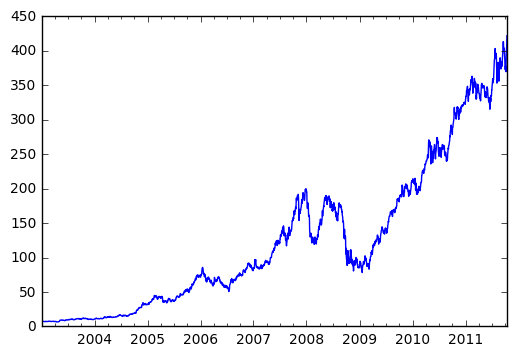

In [247]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
close_px.AAPL.plot(ax=ax)

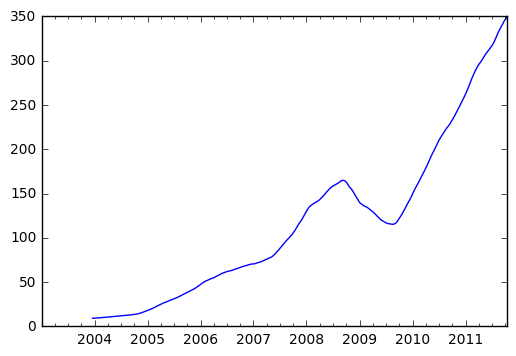

In [250]:
fig, axes = plt.subplots(1, 1)
close_px.AAPL.rolling(250).mean().plot(ax=axes)

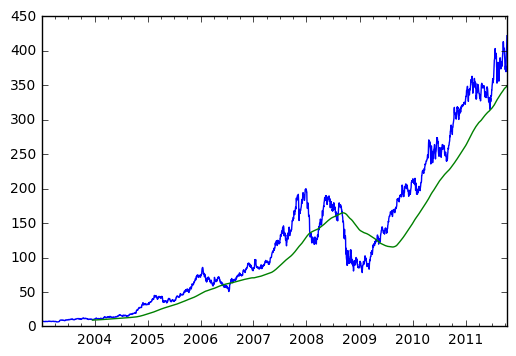

In [255]:
#把两条线贴到同一张图中
#rolling(250)得到的是滑动窗口平均值
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
close_px.AAPL.plot(ax=ax)
close_px.AAPL.rolling(250).mean().plot(ax=ax,color='g')

In [256]:
#计算扩展窗口均值，使用expanding算子。
#扩展均值从时间序列的起始位置开始时间窗口，并增加窗口大小，直到覆盖整个序列。

In [265]:
apple_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]

2003-01-09    7.34
2003-01-10    7.36
2003-01-13    7.32
2003-01-14    7.30
2003-01-15    7.22
2003-01-16    7.31
2003-01-17    7.05
Freq: B, Name: AAPL, dtype: float64

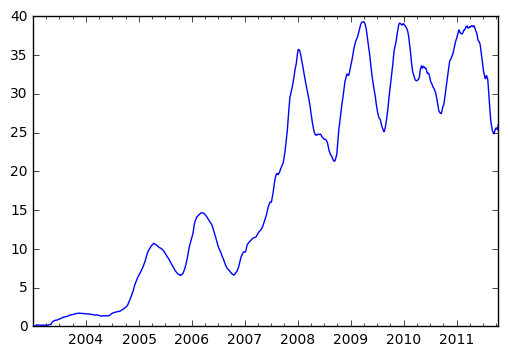

In [266]:
apple_std250.plot()

In [267]:
expanding_mean = apple_std250.expanding().mean()

C:\Program Files\Python35\lib\site-packages\matplotlib\scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


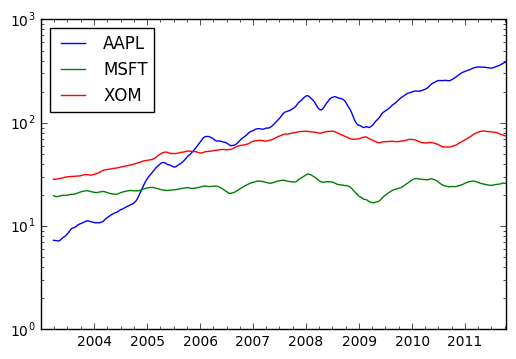

In [268]:
close_px.rolling(60).mean().plot(logy=True)

In [269]:
#rolling函数同样接收表示固定大小的时间偏置字符串，而不只是一个区间的集合数字。
#计算20天的滚动平均值

In [264]:
close_px.rolling('20D').mean().head()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000


7.1 指数加权函数

In [276]:
#指定一个常数衰减因子可以向更多近期观测值提供更多权重，可以替代使用具有相等加权观察值的静态窗口尺寸的方法。
#有多种方式可以指定衰减因子。其中一种流行的方式是使用一个span（跨度），是的结果与窗口大小等于跨度的简单易懂窗口函数。
#由于指数加权统计值给更近期的观测值以更多的权重，与等权重版本相比，它对“变化”的适应更快

In [277]:
aapl_px = close_px.AAPL['2006':'2007']
#pandas拥有ewm算子，同rolling，expanding一起使用。以下是苹果公司股票价格60日均线与span=60的EW移动平均线进行比较的例子。

In [278]:
ma60 = aapl_px.rolling(30, min_periods=20).mean()

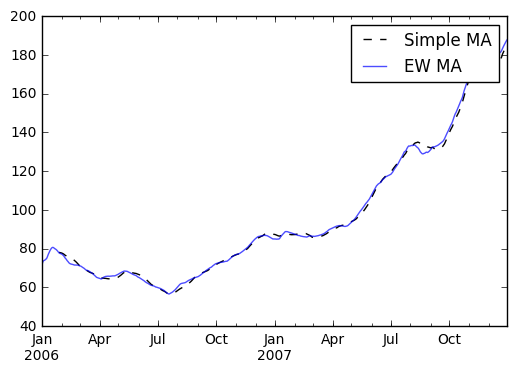

In [285]:
#简单移动平均和指数加权对比
ewma60 = aapl_px.ewm(span=30).mean()
ma60.plot(style='k--', label='Simple MA',alpha=1)
ewma60.plot(style='b-', label='EW MA', alpha=0.7)
plt.legend()

7.2 二元移动窗口函数

In [288]:
# 一些统计指标需要通过两列时间序列进行计算，例如相关性和协方差等。
# 举一个时间序列的百分比变化的栗子：

In [289]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

In [291]:
spx_rets.head(5)

2003-01-02         NaN
2003-01-03   -0.000484
2003-01-06    0.022474
2003-01-07   -0.006545
2003-01-08   -0.014086
Name: SPX, dtype: float64

In [293]:
returns.head(5)

,AAPL,MSFT,XOM
2003-01-02,NaN,NaN,NaN
2003-01-03,0.006757,0.001421,0.000684
2003-01-06,0.000000,0.017975,0.024624
2003-01-07,-0.002685,0.019052,-0.033712
2003-01-08,-0.020188,-0.028272,-0.004145


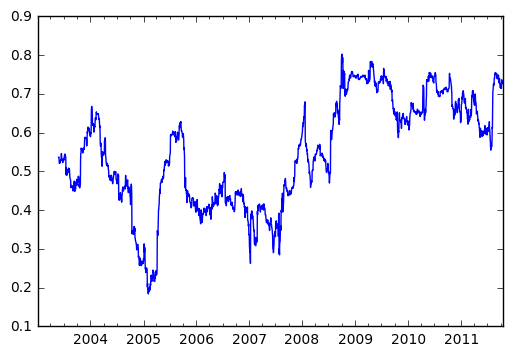

In [296]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()
#苹果公司与标普500的六个月收益相关性

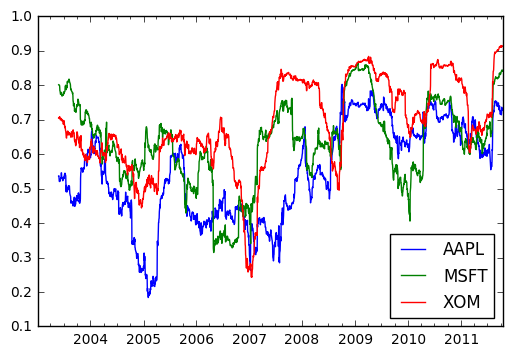

In [297]:
#多列股票与标普500之间的相关性
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

7.3 用户自定义的移动窗口函数

In [302]:
# 在rolling的基础上apply自定义函数可以实现自主设计的数组函数;
# 唯一的要求是自定义函数从每个数组中产生一个单值结果（缩聚）。

In [301]:
from scipy.stats import percentileofscore

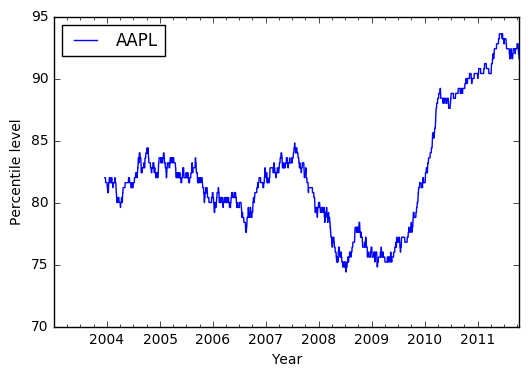

In [309]:
#一年窗口下苹果公司股价2%收益的百分位等级
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
result.plot(ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Percentile level')
ax.legend(loc = 'best')